##  MTTR Analysis
### Importing required Libraries

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Exporting the dataset

In [79]:
base = 'C://Users//n0r043t//Downloads//incident_sla.csv'
df = pd.read_csv(base,header = 0)

In [83]:
df.shape

(72, 9)

#### Sorting the Dataframe

In [86]:
df = df.sort_values(by='taskslatable_end_time', ascending=False)

#### Renaming the columns to match with the comparing dataset

In [89]:
df = df.rename(columns={'inc_number': 'Number'})

In [93]:
df = df.drop_duplicates(subset=None, keep='first', inplace=False)

#### Loading the base dataset which needs to be compared. And extarcting only the columns required

In [95]:
Incident_metric = 'C://Users//n0r043t//Downloads//incident_metric_w43.xlsx'
df1 = pd.read_excel(Incident_metric,sheet_name='Base',header = 0)

In [99]:
df_filtered = df1[['Number','AppName','Task assigned to' ]]

#### Merging of the dataframes to single dataframe

In [103]:
result = df.merge(df_filtered, on='Number', how='left')

#### Converting new column named Hours to get the duration in hours.

In [144]:
result['Hours'] = result['taskslatable_duration'] /60/60


#### Transforming the dataframe to excels and creating the pviot table

In [114]:
result.to_excel('C://Users//n0r043t//Desktop//DRS//MTTR.xlsx',sheet_name='MTTR')

In [119]:
pivot_table = result.pivot_table(
    values=['Number', 'Hours'],  # Specify columns to aggregate
    index='AppName',       # Group by Department
    aggfunc={'Number': 'count', 'Hours': 'sum'}  # Aggregation functions
)

In [121]:
pivot_table['MTTR'] = pivot_table['Hours'] /pivot_table['Number']
pivot_table.head()

,Hours,Number,MTTR
AppName,,,
ACC,689.202778,19,36.273830
Bakery,211.280556,4,52.820139
Firearms,243.721389,17,14.336552
Kiosk,133.458611,4,33.364653
MisQ,74.254167,1,74.254167


In [215]:
pivot_table.to_excel('C://Users//n0r043t//Desktop//DRS//MTTR.xlsx',sheet_name='Cal')

#### Creating the line chart with the MTTR for different applications

Text(0.5, 1.0, 'MTTR - Analysis')

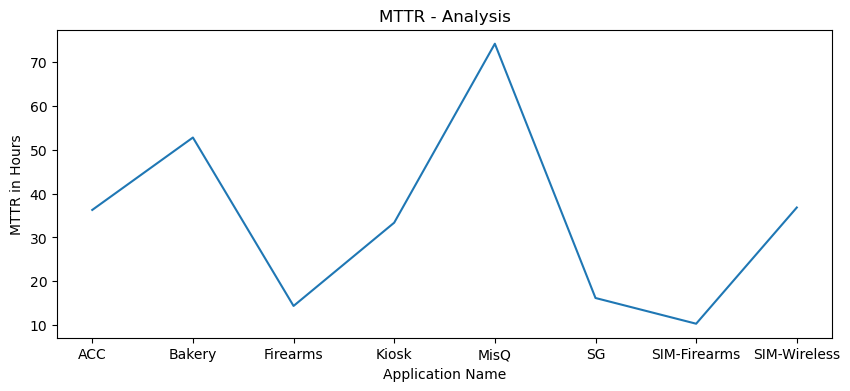

In [139]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=pivot_table, x='AppName', y='MTTR')
plt.xlabel("Application Name")
plt.ylabel("MTTR in Hours")
plt.title("MTTR - Analysis")

### Conclusion
##### From the above we can conclude the time taken to resolve MISQ which is misqueue incident is very high.Team needs to work with croofunactional team to identify the barrier and rectify the issue.